0.07566825844573456
0.07566825844573456
0.03286826692648297
0.03286826692648297
0.019987677878001188
0.019987677878001188
0.0033013178074463817
0.0033013178074463817
0.00211621432088143
0.00211621432088143
0.0021325883584084183
0.0021325883584084183
0.0003361311807055721
0.0003361311807055721
0.00023409619015570527
0.00023409619015570527
[[0.000821 0.002106 0.009774 0.029946 0.101396 0.436176 1.628294 6.288756]
 [0.000431 0.00142  0.00158  0.002774 0.006826 0.015311 0.033018 0.071235]]


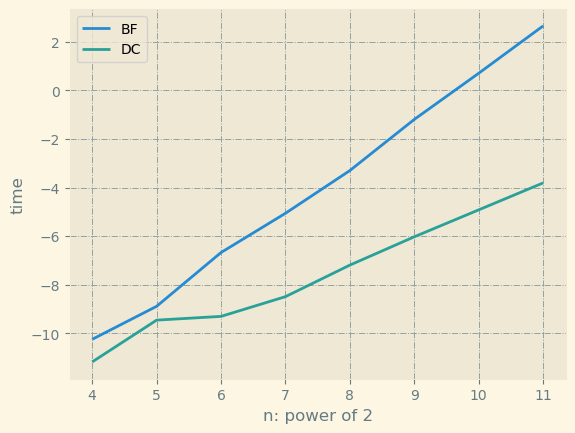

In [2]:
import time

import matplotlib.pyplot as plt
import numpy as np


def dist(u, v):  # 计算距离
    return np.linalg.norm(u - v)


def closest_pair(v, low, high, sort_y):
    if high - low <= 2:  # 如果不超过3个点 不再递归 直接求最小距离
        d = float("inf")
        for i in range(low, high+1):
            for j in range(i+1, high+1):
                d = min(d, dist(v[i], v[j]))
        return d

    mid = int((low+high)/2)
    xmid = (v[mid, 0] + v[mid+1, 0]) / 2  # 中线位置

    index = [i for i in sort_y if low <= i and i <= mid]  # 左半元素按y升序后的索引
    dl = closest_pair(v, low, mid, index)

    index = [i for i in sort_y if mid+1 <= i and i <= high]  # 右半元素按y升序后的索引
    dr = closest_pair(v, mid+1, high, index)

    d = min(dl, dr)

    for i in range(len(sort_y)-1, -1, -1):  # 删除所有不在中间带状区域中的点
        if v[sort_y[i], 0] - xmid >= d or v[sort_y[i], 0] - xmid <= -d:
            sort_y = np.delete(sort_y, i)

    closest = float("inf")
    l = len(sort_y)
    for i in range(l-1):  # 计算带状区域中的最近点对
        j = i + 1
        while j < l and v[sort_y[j], 1] - v[sort_y[i], 1] <= d:  # 最多考虑7个点
            closest = min(closest, dist(v[sort_y[i]], v[sort_y[j]]))
            j += 1

    return min(closest, d)


np.random.seed(1566)

trial = 8
time_cost = np.zeros([2, trial])

for t in range(trial):

    n = 2**(t+4)
    v = np.random.rand(n, 2)     # 随机生成n个点

    tc = time.time()
    closest = float("inf")
    for i in range(n):
        for j in range(i+1, n):
            d = dist(v[i], v[j])  # 暴力穷举
            if d < closest:
                closest = d
    time_cost[0, t] = time.time() - tc
    print(closest)

    tc = time.time()
    v = v[v[:, 0].argsort()]    # 对v按x升序
    sort_y = v[:, 1].argsort()  # 对v按y升序 sort_y记录升序后元素在原来v中的索引
    closest = closest_pair(v, 0, n-1, sort_y)
    time_cost[1, t] = time.time() - tc
    print(closest)

np.set_printoptions(precision=6, suppress=True)
print(time_cost)

with plt.style.context('Solarize_Light2'):
    x = [v for v in range(4, 4+trial)]
    plt.plot(x, np.log2(time_cost[0, :]), label="BF")  # 对数坐标轴
    plt.plot(x, np.log2(time_cost[1, :]), label="DC")  # 对数坐标轴
    plt.xlabel('n: power of 2')
    plt.ylabel('time')
    plt.legend()
    plt.grid(color='#93a1a1', linestyle='-.', linewidth=0.7)
    plt.savefig('cp.svg', transparent=True)
    plt.show()
